In [20]:
import matplotlib.pyplot as plt
import numpy as np
import time

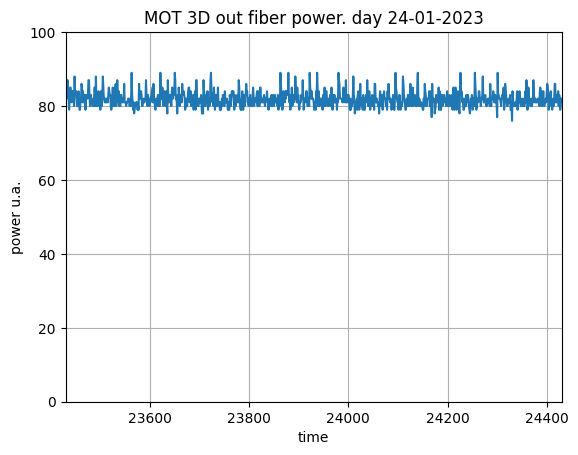

In [81]:
date = "24-01-2023"

nome = "dati/output"+"24-01-2023_300_reps_1_sec"+".txt"
#teensy_for_dipolar_trap/dati/output24-01-2023_300_reps_1_sec.txt
file = open(nome, "r")

times = []
powers = []

for line in file:
    items = line.split(" ")
    power_temp = items[2].replace("\n","")
    if int(power_temp) < 90 and int(power_temp) > 75:
        powers.append(int(power_temp))
    # qui lo splitto e riempio times e temperatures
    # stando attento alle date che ancora non ho capito che tipo sono

plt.plot(powers)
plt.xlabel("time")
plt.ylabel("power u.a.")
plt.title(f"MOT 3D out fiber power. day {date}")
#if len(powers)>1001:
plt.xlim([len(powers)-1000, len(powers)])
plt.ylim([0,100])
plt.grid()

plt.show()

In [88]:
new_x = np.linspace(0, len(powers), 208)
new_y = np.interp(new_x, np.arange(0, len(powers)), powers)

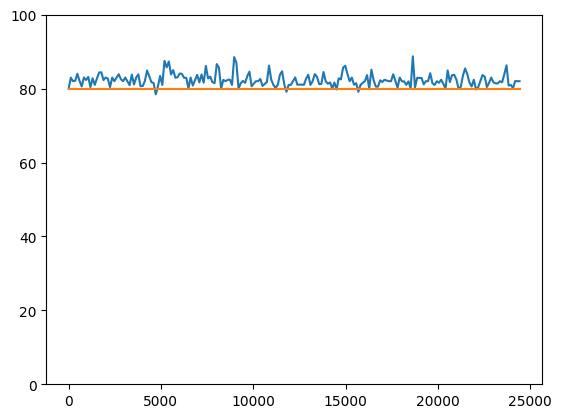

In [89]:
plt.plot(new_x, new_y)
plt.ylim([0,100])
plt.plot([0,len(powers)],[80,80])
plt.show()

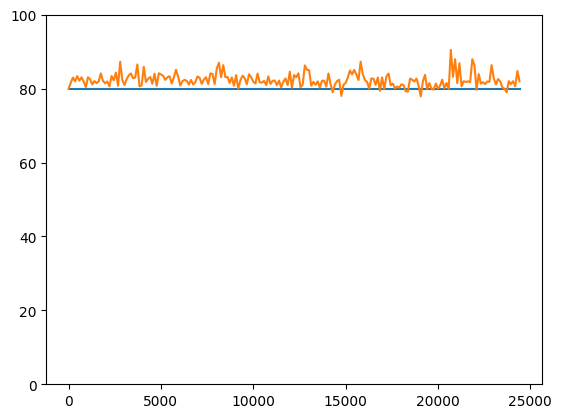

In [94]:
from scipy.interpolate import make_interp_spline, BSpline

T = np.arange(0,len(powers))
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 211) 

spl = make_interp_spline(T, powers, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.ylim([0,100])
plt.plot([0,len(powers)],[80,80])

plt.plot(xnew, power_smooth)
plt.show()